# 1.Importando libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 2.Importando dados

In [2]:
faturamento_total = pd.read_excel("apoio_case_1.xlsx", sheet_name='Faturamento_total', index_col="Data")
faturamento_sp1 = pd.read_excel("apoio_case_1.xlsx", sheet_name='Faturamento_Regiao_SP_1', index_col="Data")
faturamento_sp2 = pd.read_excel("apoio_case_1.xlsx", sheet_name='Faturamento_Regiao_SP_2', index_col="Data")
faturamento_rj = pd.read_excel("apoio_case_1.xlsx", sheet_name='Faturamento_Regiao_RJ', index_col="Data")
pesquisa_sp1 = pd.read_excel("apoio_case_1.xlsx", sheet_name='Pesquisa_SP_1', index_col="Região SP 1")
pesquisa_sp2 = pd.read_excel("apoio_case_1.xlsx", sheet_name='Pesquisa_SP_2', index_col="Região SP 2")
pesquisa_rj = pd.read_excel("apoio_case_1.xlsx", sheet_name='Pesquisa_RJ_1', index_col="Região RJ 1")

faturamento_total

,Faturamento
Data,
2022-03-30,4.004946e+07
2022-04-30,4.143103e+07
2022-05-30,4.350258e+07
2022-06-30,4.638311e+07
2022-07-30,4.777460e+07
2022-08-30,4.910578e+07
2022-09-30,5.142862e+07
2022-10-30,5.110742e+07
2022-11-30,4.921360e+07


# 3.Organizando dados

### 3.1.Trocando as linhas por colunas da pesquisa

In [3]:
pesquisa_sp1 = pesquisa_sp1.T
pesquisa_sp2 = pesquisa_sp2.T
pesquisa_rj = pesquisa_rj.T
pesquisa_sp1.index = pd.to_datetime(pesquisa_sp1.index)
pesquisa_sp2.index = pd.to_datetime(pesquisa_sp2.index)
pesquisa_rj.index = pd.to_datetime(pesquisa_rj.index)
pesquisa_sp1

Região SP 1,Localização conveniente,Temperatura do café,Funcionários gentis,Preço do café,Meu café favorito
2022-07-30,4.0,4.6,4.6,4.1,4.1
2022-08-30,4.1,4.4,4.5,4.0,4.2
2022-09-30,4.6,4.0,4.5,4.2,4.2
2022-10-30,4.5,4.1,4.6,4.2,4.3
2022-11-30,4.5,4.1,4.4,4.1,4.2
2022-12-30,4.2,4.2,4.1,4.0,4.1
2023-01-30,4.3,4.2,4.3,4.2,4.2


### 3.2.Juntando por loja

In [4]:
faturamento_total.index = pd.to_datetime(faturamento_total.index)
faturamento_sp1.index = pd.to_datetime(faturamento_sp1.index)
faturamento_sp2.index = pd.to_datetime(faturamento_sp2.index)
faturamento_rj.index = pd.to_datetime(faturamento_rj.index)

dados_sp1 = pd.merge(faturamento_sp1, pesquisa_sp1, left_index=True, right_index=True)
dados_sp1.columns = ['Faturamento SP 1', 'Loc SP 1', 'Temp SP 1', 'Func SP 1', 'Preço SP 1', 'Fav SP 1']

dados_sp2 = pd.merge(faturamento_sp2, pesquisa_sp2, left_index=True, right_index=True)
dados_sp2.columns = ['Faturamento SP 2', 'Loc SP 2', 'Temp SP 2', 'Func SP 2', 'Preço SP 2', 'Fav SP 2']

dados_rj = pd.merge(faturamento_rj, pesquisa_rj, left_index=True, right_index=True)
dados_rj.columns = ['Faturamento RJ', 'Loc RJ', 'Temp RJ', 'Func RJ', 'Preço RJ', 'Fav RJ']

dados_sp1

,Faturamento SP 1,Loc SP 1,Temp SP 1,Func SP 1,Preço SP 1,Fav SP 1
2022-07-30,15038257.0,4.0,4.6,4.6,4.1,4.1
2022-08-30,15489405.0,4.1,4.4,4.5,4.0,4.2
2022-09-30,16263875.0,4.6,4.0,4.5,4.2,4.2
2022-10-30,16751791.0,4.5,4.1,4.6,4.2,4.3
2022-11-30,16919309.0,4.5,4.1,4.4,4.1,4.2
2022-12-30,17765275.0,4.2,4.2,4.1,4.0,4.1
2023-01-30,17768264.0,4.3,4.2,4.3,4.2,4.2


### 3.3.Juntando todos

In [5]:
dados_gerais = pd.merge(faturamento_total, dados_sp1, left_index=True, right_index=True)
dados_gerais = pd.merge(dados_gerais, dados_sp2, left_index=True, right_index=True)
dados_gerais = pd.merge(dados_gerais, dados_rj, left_index=True, right_index=True)

dados_gerais.rename(columns={'Faturamento': 'Faturamento total'}, inplace=True)
dados_gerais.index.name = 'Data'

dados_gerais

,Faturamento total,Faturamento SP 1,Loc SP 1,Temp SP 1,Func SP 1,Preço SP 1,Fav SP 1,Faturamento SP 2,Loc SP 2,Temp SP 2,Func SP 2,Preço SP 2,Fav SP 2,Faturamento RJ,Loc RJ,Temp RJ,Func RJ,Preço RJ,Fav RJ
Data,,,,,,,,,,,,,,,,,,,
2022-07-30,47774599.0,15038257.0,4.0,4.6,4.6,4.1,4.1,21471650.0,4.3,4.8,4.3,4.1,4.0,11264692,3.8,4.6,4.0,4.2,4.1
2022-08-30,49105775.0,15489405.0,4.1,4.4,4.5,4.0,4.2,21901090.0,4.2,4.5,4.2,4.3,3.9,11715280,4.0,4.7,4.0,4.4,4.2
2022-09-30,51428617.0,16263875.0,4.6,4.0,4.5,4.2,4.2,23215156.0,4.4,4.4,4.3,4.1,4.1,11949586,3.9,4.5,4.0,4.4,4.2
2022-10-30,51107423.0,16751791.0,4.5,4.1,4.6,4.2,4.3,22286550.0,4.2,4.6,4.1,3.7,4.2,12069082,3.9,4.7,3.9,4.4,4.3
2022-11-30,49213603.0,16919309.0,4.5,4.1,4.4,4.1,4.2,20949357.0,4.1,4.6,4.4,3.3,4.2,11344937,3.9,4.5,4.1,4.4,4.2
2022-12-30,47352100.0,17765275.0,4.2,4.2,4.1,4.0,4.1,17901540.0,4.2,4.7,4.5,3.1,4.1,11685285,4.0,4.8,4.0,4.4,4.1
2023-01-30,42270952.0,17768264.0,4.3,4.2,4.3,4.2,4.2,12700550.0,4.3,4.8,4.2,2.8,4.0,11802138,4.0,4.6,4.1,4.2,4.3


Como vemos que o faturamento de sp1 só cresce e rj se mantém relativamente constante, vão ser usados como verificação. Vamos focar no que acontece com sp2 que é o que apresenta maior queda de faturamento.

# 4. Estatística Descritiva por loja

In [6]:
dados_sp1.describe()

,Faturamento SP 1,Loc SP 1,Temp SP 1,Func SP 1,Preço SP 1,Fav SP 1
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.657088e+07,4.314286,4.228571,4.428571,4.114286,4.185714
std,1.050969e+06,0.226779,0.205866,0.179947,0.089974,0.069007
min,1.503826e+07,4.000000,4.000000,4.100000,4.000000,4.100000
25%,1.587664e+07,4.150000,4.100000,4.350000,4.050000,4.150000
50%,1.675179e+07,4.300000,4.200000,4.500000,4.100000,4.200000
75%,1.734229e+07,4.500000,4.300000,4.550000,4.200000,4.200000
max,1.776826e+07,4.600000,4.600000,4.600000,4.200000,4.300000


In [7]:
dados_sp2.describe()

,Faturamento SP 2,Loc SP 2,Temp SP 2,Func SP 2,Preço SP 2,Fav SP 2
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.006084e+07,4.242857,4.628571,4.285714,3.628571,4.071429
std,3.649345e+06,0.097590,0.149603,0.134519,0.573627,0.111270
min,1.270055e+07,4.100000,4.400000,4.100000,2.800000,3.900000
25%,1.942545e+07,4.200000,4.550000,4.200000,3.200000,4.000000
50%,2.147165e+07,4.200000,4.600000,4.300000,3.700000,4.100000
75%,2.209382e+07,4.300000,4.750000,4.350000,4.100000,4.150000
max,2.321516e+07,4.400000,4.800000,4.500000,4.300000,4.200000


In [8]:
dados_rj.describe()

,Faturamento RJ,Loc RJ,Temp RJ,Func RJ,Preço RJ,Fav RJ
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.00000
mean,1.169014e+07,3.928571,4.628571,4.014286,4.342857,4.20000
std,2.956009e+05,0.075593,0.111270,0.069007,0.097590,0.08165
min,1.126469e+07,3.800000,4.500000,3.900000,4.200000,4.10000
25%,1.151511e+07,3.900000,4.550000,4.000000,4.300000,4.15000
50%,1.171528e+07,3.900000,4.600000,4.000000,4.400000,4.20000
75%,1.187586e+07,4.000000,4.700000,4.050000,4.400000,4.25000
max,1.206908e+07,4.000000,4.800000,4.100000,4.400000,4.30000


Podemos ver que em sp2 os mínimos de meu café favorito e preços estão abaixo dos demais (principalmente o último que também possui um desvio padrão bem distante das demais lojas e atributos, podendo ser um indicativo do problema)

# 5.Correlação por loja

Tentando identificar correlações relevantes entre faturamento e os demais atributos

In [9]:
dados_sp1.corr()["Faturamento SP 1"].sort_values(ascending=False)

Faturamento SP 1    1.000000
Loc SP 1            0.398880
Preço SP 1          0.168918
Fav SP 1            0.119304
Temp SP 1          -0.632342
Func SP 1          -0.781914
Name: Faturamento SP 1, dtype: float64

In [10]:
dados_sp2.corr()["Faturamento SP 2"].sort_values(ascending=False)

Faturamento SP 2    1.000000
Preço SP 2          0.835549
Fav SP 2            0.220952
Loc SP 2           -0.024774
Func SP 2          -0.080174
Temp SP 2          -0.677934
Name: Faturamento SP 2, dtype: float64

In [11]:
dados_rj.corr()["Faturamento RJ"].sort_values(ascending=False)

Faturamento RJ    1.000000
Fav RJ            0.636155
Loc RJ            0.415989
Preço RJ          0.362196
Temp RJ           0.243287
Func RJ          -0.500162
Name: Faturamento RJ, dtype: float64

Podemos perceber uma correlação forte entre o preço e a temperatura (inversamente) com o faturamento, os mesmos serão explorados mais a fundo.

# 6. Boxplot

### 6.1. Preço

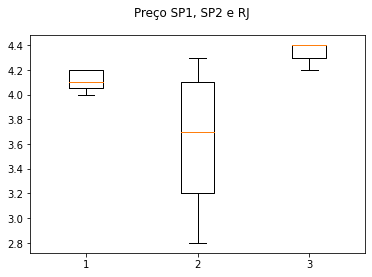

In [12]:
data = [dados_sp1["Preço SP 1"], dados_sp2["Preço SP 2"], dados_rj["Preço RJ"]]
fig, ax = plt.subplots()
fig.suptitle("Preço SP1, SP2 e RJ")
ax.boxplot(data)

plt.show()

### 6.2. Temperatura

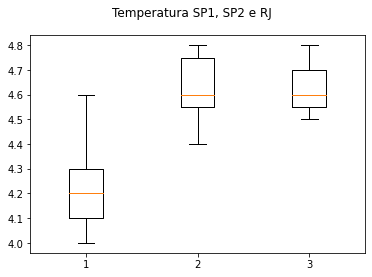

In [13]:
data = [dados_sp1["Temp SP 1"], dados_sp2["Temp SP 2"], dados_rj["Temp RJ"]]
fig, ax = plt.subplots()
fig.suptitle("Temperatura SP1, SP2 e RJ")
ax.boxplot(data)

plt.show()

Como preço é realmente o que mais destaca SP vamos seguir com ele

### 6.3. Demais

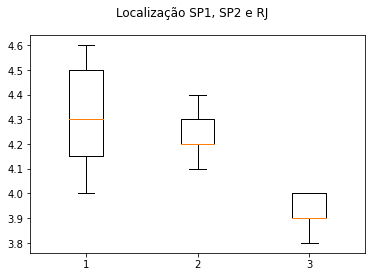

In [14]:
data = [dados_sp1["Loc SP 1"], dados_sp2["Loc SP 2"], dados_rj["Loc RJ"]]
fig, ax = plt.subplots()
fig.suptitle("Localização SP1, SP2 e RJ")
ax.boxplot(data)

plt.show()

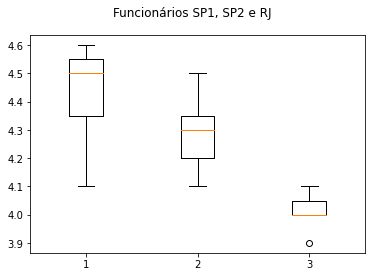

In [15]:
data = [dados_sp1["Func SP 1"], dados_sp2["Func SP 2"], dados_rj["Func RJ"]]
fig, ax = plt.subplots()
fig.suptitle("Funcionários SP1, SP2 e RJ")
ax.boxplot(data)

plt.show()

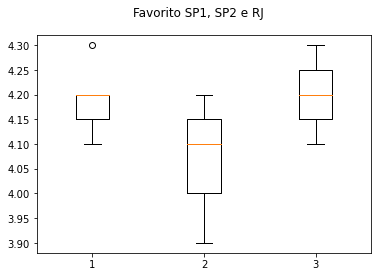

In [16]:
data = [dados_sp1["Fav SP 1"], dados_sp2["Fav SP 2"], dados_rj["Fav RJ"]]
fig, ax = plt.subplots()
fig.suptitle("Favorito SP1, SP2 e RJ")
ax.boxplot(data)

plt.show()

# 7. Shapiro Test

In [17]:
shapiro_test = stats.shapiro(dados_sp2["Preço SP 2"])
shapiro_test.statistic

0.9239152073860168

In [18]:
shapiro_test.pvalue

0.5004174709320068

In [19]:
shapiro_test = stats.shapiro(dados_sp2["Temp SP 2"])
shapiro_test.statistic

0.9345842599868774

In [20]:
shapiro_test.pvalue

0.5905254483222961

In [21]:
shapiro_test = stats.shapiro(dados_sp2["Faturamento SP 2"])
shapiro_test.statistic

0.8039007782936096

In [22]:
shapiro_test.pvalue

0.04476071521639824

Como o valor < 0.05 para o faturamento, não pode ser considerado normal, impedindo avanço posterior

# 9. Representações gráficas

<function matplotlib.pyplot.show(close=None, block=None)>

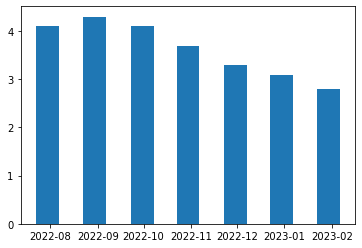

In [23]:
plt.bar(dados_sp2["Preço SP 2"].index, dados_sp2["Preço SP 2"], width=15)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

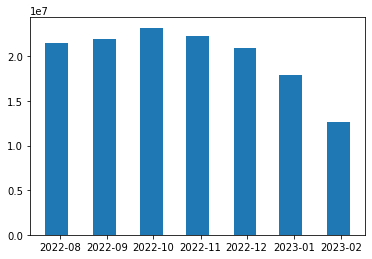

In [24]:
plt.bar(dados_sp2["Faturamento SP 2"].index, dados_sp2["Faturamento SP 2"], width=15)

plt.show